# Import Libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn import svm

# Functions

In [4]:
def cm(y_real, y_pred, t='test'):
    cf = confusion_matrix(y_real, y_pred)
    print(f"Confusion Matrix {t}: ")
    akws = {"ha": 'center',"va": 'top'}
    sns.heatmap(cf/(np.sum(cf)),annot=True, fmt='0.2%',cmap='Blues', annot_kws=akws, cbar=False)

    akws = {"ha": 'center',"va": 'bottom'}
    sns.heatmap(cf,annot=True, fmt='0',cmap='Blues', annot_kws=akws)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## Load in Dataset

In [5]:
df = pd.read_csv('FOREX_eursgd-hour-High.csv')

In [6]:
df.head()

,Timestamp,Bid_Open,Bid_High,Bid_Low,Bid_Close,Bid_Volume,Ask_Open,Ask_High,Ask_Low,Ask_Close,Ask_Volume,Class
0,'2012-01-01T23:00:00',1.67740,1.67891,1.67550,1.67835,1647.9100,1.67830,1.68018,1.67628,1.67905,1656.54,True
1,'2012-01-02T00:00:00',1.67894,1.68058,1.67687,1.67903,1029.3199,1.67966,1.68453,1.67895,1.68001,1034.25,False
2,'2012-01-02T01:00:00',1.67897,1.68036,1.67605,1.67631,1307.1200,1.67983,1.68342,1.67720,1.67809,1321.67,False
3,'2012-01-02T02:00:00',1.67667,1.67831,1.67551,1.67728,401.2100,1.67839,1.67959,1.67736,1.67900,412.30,False
4,'2012-01-02T03:00:00',1.67737,1.67793,1.67543,1.67688,438.8700,1.67892,1.67933,1.67694,1.67787,452.91,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43825 entries, 0 to 43824
Data columns (total 12 columns):
Timestamp     43825 non-null object
Bid_Open      43825 non-null float64
Bid_High      43825 non-null float64
Bid_Low       43825 non-null float64
Bid_Close     43825 non-null float64
Bid_Volume    43825 non-null float64
Ask_Open      43825 non-null float64
Ask_High      43825 non-null float64
Ask_Low       43825 non-null float64
Ask_Close     43825 non-null float64
Ask_Volume    43825 non-null float64
Class         43825 non-null bool
dtypes: bool(1), float64(10), object(1)
memory usage: 3.7+ MB


In [8]:
df.describe()

,Bid_Open,Bid_High,Bid_Low,Bid_Close,Bid_Volume,Ask_Open,Ask_High,Ask_Low,Ask_Close,Ask_Volume
count,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000,43825.000000
mean,1.593487,1.594566,1.592425,1.593496,4020.047106,1.594046,1.595146,1.592995,1.594041,4015.054009
std,0.068808,0.068727,0.068885,0.068806,2819.768895,0.068767,0.068686,0.068842,0.068767,2814.871001
min,1.436680,1.438870,1.435360,1.436780,0.000000,1.437200,1.439260,1.435820,1.437270,0.000000
25%,1.536610,1.537780,1.535520,1.536630,1914.610000,1.537280,1.538390,1.536130,1.537260,1919.020000
50%,1.592250,1.593160,1.591310,1.592270,3349.770000,1.592750,1.593650,1.591800,1.592760,3361.129900
75%,1.633760,1.634900,1.632610,1.633760,5475.569800,1.634260,1.635430,1.633150,1.634250,5479.470200
max,1.767000,1.767070,1.764670,1.767070,30587.439500,1.767230,1.767280,1.764920,1.767280,30019.269500


**Change the target to 1 and 0**

In [9]:
lb = LabelEncoder()

In [10]:
df['Class'] = lb.fit_transform(df['Class'])

In [11]:
df.head()

,Timestamp,Bid_Open,Bid_High,Bid_Low,Bid_Close,Bid_Volume,Ask_Open,Ask_High,Ask_Low,Ask_Close,Ask_Volume,Class
0,'2012-01-01T23:00:00',1.67740,1.67891,1.67550,1.67835,1647.9100,1.67830,1.68018,1.67628,1.67905,1656.54,1
1,'2012-01-02T00:00:00',1.67894,1.68058,1.67687,1.67903,1029.3199,1.67966,1.68453,1.67895,1.68001,1034.25,0
2,'2012-01-02T01:00:00',1.67897,1.68036,1.67605,1.67631,1307.1200,1.67983,1.68342,1.67720,1.67809,1321.67,0
3,'2012-01-02T02:00:00',1.67667,1.67831,1.67551,1.67728,401.2100,1.67839,1.67959,1.67736,1.67900,412.30,0
4,'2012-01-02T03:00:00',1.67737,1.67793,1.67543,1.67688,438.8700,1.67892,1.67933,1.67694,1.67787,452.91,1


**Train Test Split**

In [12]:
X = df.drop(['Class', 'Timestamp'], axis=1)

In [13]:
y = df.Class

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

## Build a baseline random forest

In [15]:
rf = RandomForestClassifier(n_estimators=100)

In [86]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [87]:
preds = rf.predict(X_test)

Confusion Matrix test: 


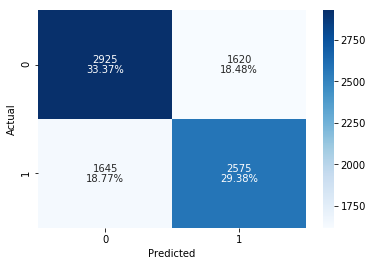

In [88]:
cm(y_test, preds)

In [89]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      4545
           1       0.61      0.61      0.61      4220

   micro avg       0.63      0.63      0.63      8765
   macro avg       0.63      0.63      0.63      8765
weighted avg       0.63      0.63      0.63      8765



We are not getting great accuracy from this

## Gridsearch

In [50]:
clf = RandomForestClassifier()
param_grid = {
    "n_estimators": [10,50,100],
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 2, 5, 10],
    "min_samples_leaf": [10, 15, 20, 25],
    "min_impurity_decrease": [.001, .01, .1, .15]
}
gs_tree = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy',  n_jobs=-1, verbose=2)
gs_tree.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  6.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 5, 10], 'min_samples_leaf': [10, 15, 20, 25], 'min_impurity_decrease': [0.001, 0.01, 0.1, 0.15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=2)

In [51]:
gs_tree.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_impurity_decrease': 0.001,
 'min_samples_leaf': 25,
 'n_estimators': 10}

In [75]:
rf2 = RandomForestClassifier(criterion='gini', max_depth=5, min_impurity_decrease=.001, min_samples_leaf=25, n_estimators=10)

In [76]:
rf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.001, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
preds2 = rf2.predict(X_test)

Confusion Matrix test: 


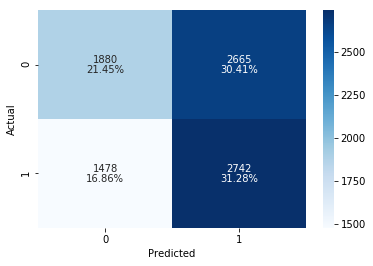

In [78]:
cm(y_test, preds2)

In [79]:
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       0.56      0.41      0.48      4545
           1       0.51      0.65      0.57      4220

   micro avg       0.53      0.53      0.53      8765
   macro avg       0.53      0.53      0.52      8765
weighted avg       0.53      0.53      0.52      8765



Obviously terrible, let us look at a better way to checkout the results of the gridsearch

In [57]:
gs_tree.cv_results_

C:\Users\lraic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lraic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lraic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lraic\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([0.16500635, 0.74180112, 1.54619808, 0.16199794, 0.83760009,
        1.68319845, 0.17259936, 0.88840127, 1.65979447, 0.1730032 ,
        0.80399919, 1.61579885, 0.17100019, 0.8435977 , 1.75039334,
        0.17379823, 0.84259439, 1.59919443, 0.17059722, 0.81339464,
        1.70019674, 0.17799845, 0.99199762, 2.02299843, 0.23900051,
        0.96379876, 1.9451983 , 0.20219836, 0.97300348, 1.87520037,
        0.19799709, 0.95739846, 1.87400155, 0.2013989 , 0.95299649,
        1.88719883, 0.19799953, 0.94640031, 1.85539885, 0.19959903,
        0.95019698, 1.86939816, 0.20019164, 0.95779777, 1.99879808,
        0.22779808, 0.94339886, 1.86079803, 0.27139792, 1.33500209,
        2.48779793, 0.27239628, 1.2381988 , 2.49579391, 0.27699418,
        1.28801265, 2.47839479, 0.24919853, 1.24739618, 2.5902009 ,
        0.1945971 , 0.99859943, 2.00579824, 0.22759924, 0.95320015,
        1.8855969 , 0.20099854, 0.95419884, 1.85479426, 0.20339713,
        0.96639733, 1.92040148,

This does not help us much, but notice how everything is in dictionaries? Let's use that to put this into a pandas dataframe

In [58]:
gs_df = pd.DataFrame(gs_tree.cv_results_)

In [59]:
gs_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_n_estimators,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.165006,0.010762,0.014194,0.002387,gini,1,0.001,10,10,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.516828,0.0,24,0.516828,0.516828,0.516828,0.516828,0.516828,0.516828,0.0
1,0.741801,0.011090,0.031606,0.002324,gini,1,0.001,10,50,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.516828,0.0,24,0.516828,0.516828,0.516828,0.516828,0.516828,0.516828,0.0
2,1.546198,0.061093,0.057999,0.005098,gini,1,0.001,10,100,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.516828,0.0,24,0.516828,0.516828,0.516828,0.516828,0.516828,0.516828,0.0
3,0.161998,0.004428,0.008801,0.001167,gini,1,0.001,15,10,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.516828,0.0,24,0.516828,0.516828,0.516828,0.516828,0.516828,0.516828,0.0
4,0.837600,0.044380,0.030801,0.001722,gini,1,0.001,15,50,"{'criterion': 'gini', 'max_depth': 1, 'min_imp...",...,0.516828,0.0,24,0.516828,0.516828,0.516828,0.516828,0.516828,0.516828,0.0


Let's see what the columns are

In [60]:
gs_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_impurity_decrease',
       'param_min_samples_leaf', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [61]:
gs_df.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_n_estimators,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
105,0.309199,0.036454,0.010000,0.000002,gini,5,0.001,25,10,"{'criterion': 'gini', 'max_depth': 5, 'min_imp...",...,0.521763,0.006148,1,0.516828,0.527346,0.516828,0.516828,0.527025,0.520971,0.005075
54,0.276994,0.023886,0.009401,0.000800,gini,2,0.001,20,10,"{'criterion': 'gini', 'max_depth': 2, 'min_imp...",...,0.520165,0.004978,2,0.516828,0.516828,0.516828,0.529022,0.529770,0.521855,0.006161
297,0.451798,0.091456,0.010199,0.000401,entropy,5,0.001,25,10,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",...,0.519880,0.003931,3,0.529236,0.516828,0.516828,0.526954,0.516828,0.521335,0.005566
246,0.397995,0.025966,0.010401,0.001201,entropy,2,0.001,20,10,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",...,0.519795,0.003979,4,0.516828,0.516828,0.530020,0.531660,0.516828,0.522433,0.006884
342,0.509799,0.077281,0.012201,0.002040,entropy,10,0.001,20,10,"{'criterion': 'entropy', 'max_depth': 10, 'min...",...,0.519424,0.005120,5,0.516828,0.527774,0.516828,0.516900,0.516828,0.519032,0.004371
51,0.272396,0.023398,0.009399,0.000488,gini,2,0.001,15,10,"{'criterion': 'gini', 'max_depth': 2, 'min_imp...",...,0.518996,0.004335,6,0.516828,0.516828,0.528059,0.516828,0.516828,0.519074,0.004492
289,2.194199,0.248337,0.036001,0.001414,entropy,5,0.001,10,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",...,0.518825,0.003993,7,0.516828,0.516828,0.516828,0.528416,0.516828,0.519146,0.004635
147,0.301597,0.025894,0.010202,0.000401,gini,10,0.001,15,10,"{'criterion': 'gini', 'max_depth': 10, 'min_im...",...,0.518597,0.003537,8,0.516828,0.516828,0.526847,0.516828,0.516828,0.518832,0.004007
291,0.462799,0.034395,0.011401,0.002061,entropy,5,0.001,15,10,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",...,0.518055,0.002382,9,0.516828,0.516864,0.516828,0.530448,0.516828,0.519559,0.005444
249,0.379597,0.056790,0.009600,0.000490,entropy,2,0.001,25,10,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",...,0.518026,0.002396,10,0.528523,0.516828,0.516828,0.516828,0.516828,0.519167,0.004678


Notice that the parameters match the top line if we set the best mean_test_score to be on top

Let's try another way to do this

In [62]:
gs_df['difference'] = gs_df['mean_train_score'] - gs_df['mean_test_score']

In [63]:
gs_df.drop(['split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score'], axis=1).sort_values(by='difference').loc[gs_df['mean_test_score']>0]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_n_estimators,params,...,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split4_train_score,mean_train_score,std_train_score,difference
105,0.309199,0.036454,0.010000,0.000002,gini,5,0.001,25,10,"{'criterion': 'gini', 'max_depth': 5, 'min_imp...",...,0.516828,0.516828,0.527382,0.521763,0.006148,1,0.527025,0.520971,0.005075,-0.000792
342,0.509799,0.077281,0.012201,0.002040,entropy,10,0.001,20,10,"{'criterion': 'entropy', 'max_depth': 10, 'min...",...,0.516828,0.516971,0.516828,0.519424,0.005120,5,0.516828,0.519032,0.004371,-0.000392
337,2.119398,0.085510,0.035800,0.001327,entropy,10,0.001,10,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",...,0.516828,0.518112,0.516828,0.517085,0.000513,20,0.516828,0.517028,0.000399,-0.000057
344,4.266597,0.354899,0.074601,0.008014,entropy,10,0.001,20,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",...,0.516828,0.516828,0.517256,0.516914,0.000171,23,0.517220,0.516907,0.000157,-0.000007
250,1.777398,0.066715,0.038000,0.003742,entropy,2,0.001,25,50,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",...,0.516828,0.516828,0.516828,0.516828,0.000000,24,0.516828,0.516828,0.000000,0.000000
248,3.654998,0.073115,0.076001,0.006899,entropy,2,0.001,20,100,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",...,0.516828,0.516828,0.516828,0.516828,0.000000,24,0.516828,0.516828,0.000000,0.000000
247,1.838003,0.093359,0.037998,0.002272,entropy,2,0.001,20,50,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",...,0.516828,0.516828,0.516828,0.516828,0.000000,24,0.516828,0.516828,0.000000,0.000000
245,3.618598,0.101651,0.073204,0.005075,entropy,2,0.001,15,100,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",...,0.516828,0.516828,0.516828,0.516828,0.000000,24,0.516828,0.516828,0.000000,0.000000
244,1.774797,0.063039,0.038200,0.003869,entropy,2,0.001,15,50,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",...,0.516828,0.516828,0.516828,0.516828,0.000000,24,0.516828,0.516828,0.000000,0.000000
242,3.830997,0.240630,0.069600,0.004317,entropy,2,0.001,10,100,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",...,0.516828,0.516828,0.516828,0.516828,0.000000,24,0.516828,0.516828,0.000000,0.000000


Another thing we can do

In [64]:
gs_df['weighted_test_score'] = gs_df['mean_test_score'] - gs_df['difference']

In [65]:
gs_df.drop(['split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score'], axis=1).sort_values(by='weighted_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_n_estimators,params,...,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split4_train_score,mean_train_score,std_train_score,difference,weighted_test_score
105,0.309199,0.036454,0.010000,0.000002,gini,5,0.001,25,10,"{'criterion': 'gini', 'max_depth': 5, 'min_imp...",...,0.516828,0.527382,0.521763,0.006148,1,0.527025,0.520971,0.005075,-0.000792,0.522554
342,0.509799,0.077281,0.012201,0.002040,entropy,10,0.001,20,10,"{'criterion': 'entropy', 'max_depth': 10, 'min...",...,0.516971,0.516828,0.519424,0.005120,5,0.516828,0.519032,0.004371,-0.000392,0.519816
51,0.272396,0.023398,0.009399,0.000488,gini,2,0.001,15,10,"{'criterion': 'gini', 'max_depth': 2, 'min_imp...",...,0.516828,0.516828,0.518996,0.004335,6,0.516828,0.519074,0.004492,0.000078,0.518918
289,2.194199,0.248337,0.036001,0.001414,entropy,5,0.001,10,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",...,0.526811,0.516828,0.518825,0.003993,7,0.516828,0.519146,0.004635,0.000321,0.518504
54,0.276994,0.023886,0.009401,0.000800,gini,2,0.001,20,10,"{'criterion': 'gini', 'max_depth': 2, 'min_imp...",...,0.520679,0.529663,0.520165,0.004978,2,0.529770,0.521855,0.006161,0.001690,0.518475
297,0.451798,0.091456,0.010199,0.000401,entropy,5,0.001,25,10,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",...,0.526383,0.516828,0.519880,0.003931,3,0.516828,0.521335,0.005566,0.001455,0.518426
147,0.301597,0.025894,0.010202,0.000401,gini,10,0.001,15,10,"{'criterion': 'gini', 'max_depth': 10, 'min_im...",...,0.516828,0.516828,0.518597,0.003537,8,0.516828,0.518832,0.004007,0.000235,0.518361
340,2.132798,0.190474,0.036200,0.001470,entropy,10,0.001,15,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",...,0.518825,0.516828,0.517228,0.000799,18,0.516828,0.517292,0.000761,0.000064,0.517163
246,0.397995,0.025966,0.010401,0.001201,entropy,2,0.001,20,10,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",...,0.521677,0.516828,0.519795,0.003979,4,0.516828,0.522433,0.006884,0.002638,0.517156
337,2.119398,0.085510,0.035800,0.001327,entropy,10,0.001,10,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",...,0.518112,0.516828,0.517085,0.000513,20,0.516828,0.517028,0.000399,-0.000057,0.517142


A better set of parameters

In [80]:
rf3 = RandomForestClassifier(criterion='entropy', max_depth=10, min_impurity_decrease=.001, min_samples_leaf=20, n_estimators=10)

In [81]:
rf3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.001, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [82]:
preds3 = rf.predict(X_test)

Confusion Matrix test: 


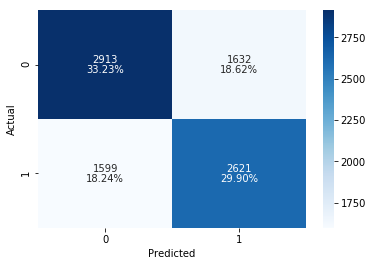

In [83]:
cm(y_test,preds3)

In [85]:
print(classification_report(y_test, preds3))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64      4545
           1       0.62      0.62      0.62      4220

   micro avg       0.63      0.63      0.63      8765
   macro avg       0.63      0.63      0.63      8765
weighted avg       0.63      0.63      0.63      8765



We are back to similar results to a baseline random forest model

## SVM

Trying the same things with SVM

In [91]:
svm_model = svm.SVC()

In [92]:
svm_model.fit(X_train, y_train)

C:\Users\lraic\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [93]:
preds4 = svm_model.predict(X_test)

Confusion Matrix test: 


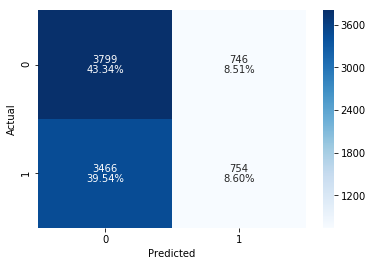

In [94]:
cm(y_test, preds4)

In [95]:
print(classification_report(y_test, preds4))

              precision    recall  f1-score   support

           0       0.52      0.84      0.64      4545
           1       0.50      0.18      0.26      4220

   micro avg       0.52      0.52      0.52      8765
   macro avg       0.51      0.51      0.45      8765
weighted avg       0.51      0.52      0.46      8765



In [98]:
clf = svm.SVC(cache_size=3500)
param_grid = {
    "C": [1,5,10],
    "gamma": [.1,1,10],
}
gs_svm = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy',  n_jobs=-1, verbose=2)
gs_svm.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 53.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=3500, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1, 5, 10], 'gamma': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=2)

In [99]:
gs_svm.best_params_

{'C': 1, 'gamma': 0.1}

In [100]:
svm_model2 = svm.SVC(cache_size=3500, C=1, gamma=.1)

In [101]:
svm_model2.fit(X_train, y_train)

SVC(C=1, cache_size=3500, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [102]:
preds5 = svm_model2.predict(X_test)

Confusion Matrix test: 


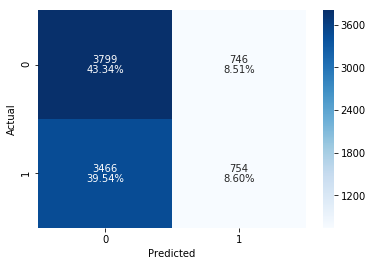

In [103]:
cm(y_test, preds5)

In [104]:
print(classification_report(y_test, preds5))

              precision    recall  f1-score   support

           0       0.52      0.84      0.64      4545
           1       0.50      0.18      0.26      4220

   micro avg       0.52      0.52      0.52      8765
   macro avg       0.51      0.51      0.45      8765
weighted avg       0.51      0.52      0.46      8765



In [105]:
gs_svm.cv_results_

C:\Users\lraic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lraic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lraic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lraic\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([311.85959396, 330.15955606, 362.37009883, 464.89218373,
        435.80827136, 529.24332252, 463.52399964, 441.17959652,
        384.91541595]),
 'std_fit_time': array([ 0.96863131,  7.25338889, 10.67409284,  3.21678955, 21.06340497,
         4.34331819,  2.1706586 , 22.61505703,  9.73633943]),
 'mean_score_time': array([27.1959991 , 27.13160496, 27.00774589, 26.96688061, 26.89206944,
        27.27660022, 27.34908252, 27.03344569, 17.5207253 ]),
 'std_score_time': array([0.29245691, 0.18973374, 0.2437964 , 0.22237818, 0.21813818,
        0.3051754 , 0.65599666, 0.25417796, 0.54907852]),
 'param_C': masked_array(data=[1, 1, 1, 5, 5, 5, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.1, 1, 10, 0.1, 1, 10, 0.1, 1, 10],
              mask=[False, False, False, False, False, False, False, False,
                

In [106]:
svm_df = pd.DataFrame(gs_svm.cv_results_)

C:\Users\lraic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lraic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lraic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lraic\Anaconda3\lib\site-packages\sklearn\util

In [107]:
svm_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,311.859594,0.968631,27.195999,0.292457,1,0.1,"{'C': 1, 'gamma': 0.1}",0.519681,0.520679,0.517541,...,0.521221,0.002618,1,0.991871,0.991336,0.992263,0.990801,0.991622,0.991579,0.000494
1,330.159556,7.253389,27.131605,0.189734,1,1,"{'C': 1, 'gamma': 1}",0.516115,0.513691,0.520394,...,0.517627,0.002425,6,0.998859,0.998574,0.998788,0.998538,0.998645,0.998681,0.000124
2,362.370099,10.674093,27.007746,0.243796,1,10,"{'C': 1, 'gamma': 10}",0.515545,0.516686,0.517399,...,0.516315,0.000679,9,0.999109,0.998788,0.999002,0.999037,0.999037,0.998995,0.000109
3,464.892184,3.216790,26.966881,0.222378,5,0.1,"{'C': 5, 'gamma': 0.1}",0.519538,0.522818,0.514974,...,0.521050,0.003667,3,0.997183,0.996827,0.996969,0.996756,0.996791,0.996905,0.000157
4,435.808271,21.063405,26.892069,0.218138,5,1,"{'C': 5, 'gamma': 1}",0.518254,0.515117,0.519538,...,0.518426,0.001860,4,0.999109,0.998788,0.999002,0.998859,0.999002,0.998952,0.000114


In [108]:
svm_df.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,311.859594,0.968631,27.195999,0.292457,1,0.1,"{'C': 1, 'gamma': 0.1}",0.519681,0.520679,0.517541,...,0.521221,0.002618,1,0.991871,0.991336,0.992263,0.990801,0.991622,0.991579,0.000494
6,463.524000,2.170659,27.349083,0.655997,10,0.1,"{'C': 10, 'gamma': 0.1}",0.519395,0.523103,0.514832,...,0.521107,0.003744,2,0.997968,0.997647,0.998003,0.997790,0.997825,0.997847,0.000129
3,464.892184,3.216790,26.966881,0.222378,5,0.1,"{'C': 5, 'gamma': 0.1}",0.519538,0.522818,0.514974,...,0.521050,0.003667,3,0.997183,0.996827,0.996969,0.996756,0.996791,0.996905,0.000157
4,435.808271,21.063405,26.892069,0.218138,5,1,"{'C': 5, 'gamma': 1}",0.518254,0.515117,0.519538,...,0.518426,0.001860,4,0.999109,0.998788,0.999002,0.998859,0.999002,0.998952,0.000114
7,441.179597,22.615057,27.033446,0.254178,10,1,"{'C': 10, 'gamma': 1}",0.518254,0.515117,0.519538,...,0.518426,0.001860,4,0.999109,0.998788,0.999002,0.998859,0.999002,0.998952,0.000114
1,330.159556,7.253389,27.131605,0.189734,1,1,"{'C': 1, 'gamma': 1}",0.516115,0.513691,0.520394,...,0.517627,0.002425,6,0.998859,0.998574,0.998788,0.998538,0.998645,0.998681,0.000124
5,529.243323,4.343318,27.276600,0.305175,5,10,"{'C': 5, 'gamma': 10}",0.515830,0.517114,0.517541,...,0.516458,0.000758,7,0.999109,0.998823,0.999073,0.999037,0.999073,0.999023,0.000102
8,384.915416,9.736339,17.520725,0.549079,10,10,"{'C': 10, 'gamma': 10}",0.515830,0.517114,0.517541,...,0.516429,0.000767,8,0.999109,0.998859,0.999002,0.999002,0.999037,0.999002,0.000081
2,362.370099,10.674093,27.007746,0.243796,1,10,"{'C': 1, 'gamma': 10}",0.515545,0.516686,0.517399,...,0.516315,0.000679,9,0.999109,0.998788,0.999002,0.999037,0.999037,0.998995,0.000109


Notice that our results are majorly overfitted

In [109]:
clf = svm.SVC(cache_size=3500)
param_grid = {
    "C": [.1,.5,.8],
    "gamma": [.1,.5,1],
}
gs_svm2 = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy',  n_jobs=-1, verbose=2)
gs_svm2.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 43.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=3500, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.1, 0.5, 0.8], 'gamma': [0.1, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=2)

In [110]:
gs_svm2.best_params_

{'C': 0.8, 'gamma': 0.1}

In [112]:
svm2_df = pd.DataFrame(gs_svm2.cv_results_)

C:\Users\lraic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lraic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lraic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\lraic\Anaconda3\lib\site-packages\sklearn\util

In [113]:
svm2_df.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
6,314.488108,0.892504,27.274000,0.152453,0.8,0.1,"{'C': 0.8, 'gamma': 0.1}",0.519253,0.522390,0.521107,...,0.520993,0.001348,1,0.984633,0.984847,0.985454,0.984348,0.984063,0.984669,0.000473
7,363.834914,1.595796,27.181001,0.177785,0.8,0.5,"{'C': 0.8, 'gamma': 0.5}",0.515687,0.515260,0.519538,...,0.517399,0.001646,2,0.996399,0.996256,0.996542,0.996078,0.996613,0.996378,0.000193
3,305.110431,3.940206,27.270999,0.161193,0.5,0.1,"{'C': 0.5, 'gamma': 0.1}",0.516971,0.517114,0.517399,...,0.517313,0.000294,3,0.614233,0.611274,0.611167,0.609776,0.609277,0.611145,0.001727
8,252.131000,21.096494,16.257812,2.627787,0.8,1,"{'C': 0.8, 'gamma': 1}",0.515117,0.515830,0.518967,...,0.517114,0.001490,4,0.997861,0.997326,0.997504,0.997397,0.997683,0.997554,0.000195
0,263.655060,3.356710,26.607013,0.241058,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.516828,0.516828,0.516828,...,0.516828,0.000000,5,0.516828,0.516828,0.516828,0.516828,0.516828,0.516828,0.000000
1,326.676852,8.500405,27.401342,0.152860,0.1,0.5,"{'C': 0.1, 'gamma': 0.5}",0.516828,0.516828,0.516828,...,0.516828,0.000000,5,0.516828,0.516828,0.516828,0.516828,0.516828,0.516828,0.000000
2,338.385158,12.917754,27.571000,0.516469,0.1,1,"{'C': 0.1, 'gamma': 1}",0.516828,0.516828,0.516828,...,0.516828,0.000000,5,0.516828,0.516828,0.516828,0.516828,0.516828,0.516828,0.000000
5,324.652999,20.736021,27.148400,0.079678,0.5,1,"{'C': 0.5, 'gamma': 1}",0.516828,0.516828,0.516828,...,0.516800,0.000057,8,0.530234,0.530234,0.527382,0.528808,0.527596,0.528851,0.001230
4,355.069998,1.481633,27.250800,0.369830,0.5,0.5,"{'C': 0.5, 'gamma': 0.5}",0.516400,0.516543,0.516971,...,0.516714,0.000210,9,0.542356,0.542784,0.539825,0.541179,0.539397,0.541108,0.001338


In [114]:
svm_model3 = svm.SVC(cache_size=3500, C=.5, gamma=.1)

In [115]:
svm_model3.fit(X_train, y_train)

SVC(C=0.5, cache_size=3500, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [116]:
svm_model3.fit(X_train, y_train)

SVC(C=0.5, cache_size=3500, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [117]:
preds6 = svm_model3.predict(X_test)

Confusion Matrix test: 


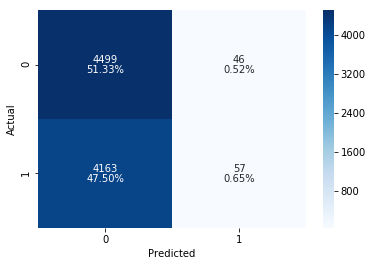

In [118]:
cm(y_test, preds6)

In [119]:
print(classification_report(y_test, preds6))

              precision    recall  f1-score   support

           0       0.52      0.99      0.68      4545
           1       0.55      0.01      0.03      4220

   micro avg       0.52      0.52      0.52      8765
   macro avg       0.54      0.50      0.35      8765
weighted avg       0.54      0.52      0.37      8765



In [120]:
svm_model4 = svm.SVC(cache_size=3500, C=.5, gamma=1)

In [121]:
svm_model4.fit(X_train, y_train)

SVC(C=0.5, cache_size=3500, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [122]:
svm_model4.fit(X_train, y_train)

SVC(C=0.5, cache_size=3500, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [123]:
preds7 = svm_model4.predict(X_test)

Confusion Matrix test: 


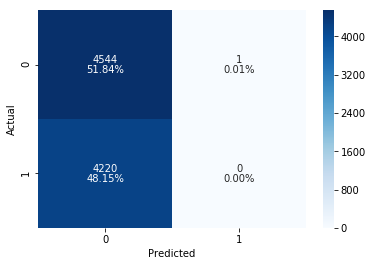

In [124]:
cm(y_test, preds7)

In [125]:
print(classification_report(y_test, preds7))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68      4545
           1       0.00      0.00      0.00      4220

   micro avg       0.52      0.52      0.52      8765
   macro avg       0.26      0.50      0.34      8765
weighted avg       0.27      0.52      0.35      8765



## Conclusion

I was not able to get any good results with the modeling methods used, though I did not do a proper EDA or really go into this data much.  
This demonstration is more to show the possibilities behind putting the gridsearch results into a dataframe so you can better decide which parameters you would choose, instead of just taking what the girdsearch says is it's best parameters